#   <center> <span style="color:#f6f794"> 🧼 Cleaning data</span> </center>
___

#### 📚 <span style="color:#f6f794"> Importing libraries and setting displays </span>

In [1]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time
from geopy.extra.rate_limiter import RateLimiter

In [2]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 

# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

#### 📂 <span style="color:#f6f794"> Opening files and create dataframes of them </span>

In [3]:
# Setting paths
current_dir = os.getcwd()                   # \Airbnb-Analysis\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)   # \Airbnb-Analysis
print(parent_dir)
data_dir = os.path.join(parent_dir, "data") # \Airbnb-Analysis\data
print(data_dir)
file_path = os.path.join(data_dir, "")      # \Airbnb-Analysis\data\
print(file_path)



c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data\


In [4]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature/data-processing-pipeline/processed_data/airbnb_complete.csv.gz"

def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHun...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(f)

        print(f"✅ Data downloaded succesfully!")
        print(f"   📋 Rows: {len(df):,}")
        print(f"   📋 Columns: {len(df.columns)}")
        print(f"   📋 Cities: {df['city'].nunique() if 'city' in df.columns else 'N/A'}")

        return df

    except Exception as e:
        print(f"❌ Error while downloading data: {e}")
        return None

# Creating dataframe from GitHub URL
df_raw_1 = load_airbnb_data_from_github(GITHUB_RAW_URL)


🔗 Downloading data from GitHun...
📊 Processing compressed file..
✅ Data downloaded succesfully!
   📋 Rows: 220,031
   📋 Columns: 17
   📋 Cities: 6


C:\Users\yaelp\AppData\Local\Temp\ipykernel_26112\2724234179.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


___
####  <span style="color:#f6f794"> Checking columns names </span>

In [5]:
df_raw_1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

####  <span style="color:#f6f794"> Quick check to data </span>

In [6]:
df_raw_1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0,Ny
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0,Ny
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1.0,365.0,Ny
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0,Ny
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0,Ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,NaN,NaN,8.0,349.0,Madrid
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,NaN,NaN,8.0,350.0,Madrid
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,NaN,NaN,8.0,364.0,Madrid
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,NaN,NaN,8.0,349.0,Madrid


####  <span style="color:#fe5608"> ["availability_365"] </span>

- Original nulls QTY: 11,466 -- 5.21%
- Distribuition with outliers
- Tokyo is the only city with no values
    - Imputed with the global mean of other cities.

TOKYO NEEDS TO BE LOOKED CAREFULLY    

####  <span style="color:#f6f794"> Columns Types </span>
- Changes:
    - ["last_review"]
        - originally it was like object but since it is a date, it was turn into a datetime type

In [7]:
df_raw_1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
city                               object
dtype: object

In [8]:
df_raw_1["last_review"] = pd.to_datetime(df_raw_1["last_review"], errors="coerce")


####  <span style="color:#f6f794"> Changing Column: ["city"] data </span>

In [9]:
df_raw_1["city"].unique()

array(['Ny', 'London', 'Milan', 'Tokyo', 'Sydney', 'Madrid'], dtype=object)

In [10]:
df_raw_1["city"] = df_raw_1["city"].replace("Ny", "New York")

####  <span style="color:#f6f794"> Cleaning text </span>

- Eliminating with method <u>.strip()</u> white spaces and other "invisible characters which might become problematic in the future.

In [11]:
df_raw_1['city'] = df_raw_1['city'].str.strip()
df_raw_1['host_name'] = df_raw_1['host_name'].str.strip()
df_raw_1['neighbourhood_group'] = df_raw_1['neighbourhood_group'].str.strip()
df_raw_1['neighbourhood'] = df_raw_1['neighbourhood'].str.strip()


####  <span style="color:#f6f794"> Seeking for duplicates </span>

- Apparently there are no duplicates rows.

In [12]:
df_raw_1['id'].duplicated().sum()
df_raw_1.duplicated().sum()

np.int64(0)

####  <span style="color:#f6f794"> Seeking for nulls </span>

In [13]:
df_raw_1.isna().sum().sort_values(ascending=False)

neighbourhood_group               151518
last_review                        67631
reviews_per_month                  54371
availability_365                   11466
calculated_host_listings_count     11466
host_name                            706
name                                  67
id                                     0
host_id                                0
room_type                              0
longitude                              0
latitude                               0
neighbourhood                          0
number_of_reviews                      0
minimum_nights                         0
price                                  0
city                                   0
dtype: int64

____
###  <span style="color:#f6f794"> Imputing nulls </span> 

- <span style="color:#fe5608">  neighbourhood_group  </span> THIS COLUMN <u>CANNOT</u> BE TAKEN INTO ACCOUNT
    - Original nulls: 151,518 
    - Imputed by "Unknown" 
        - There are no neighbourhoods_groups for the cities affected
        - The only way to impute is:
            - to use the geopy library
            - study the administrative division in countries affected
            - If there is time and this columns is really needed I'll do it
        - In the meantime, the column will be imputed with "Unknown"

- <span style="color:#fe5608">  reviews_per_month </span> THIS COLUMN <u>SHOULD NOT</u> BE TAKEN INTO ACCOUNT
    - Original nulls QTY: 54,371
        - If there are no "number_of_reviews", there are no "reviews_per_month" therefore, this will be imputed with 0 when there are no reviews to start with
    - Afeter 1st imputation:123 nulls left
        - When there are no "last_reviews", there are no "reviews_per_month", which is logic
        - Imputing with zero "0.0" when "number_of_reviews" is 1 and when "last_review" is null
            - In order not to false any data and since this column means how many reviews they got per month and since they only got 1, this might mean they got the first and only review when the "guests" just left
    - After 2nd imputation: 6 nulls left
        - Imputed by median
- <span style="color:#fe5608">  last_review </span> THIS COLUMN <u>CANNOT</u> BE TAKEN INTO ACCOUNT
    - Original nulls: 54,371 
        - Imputed with "1900-01-01" when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
            - Since a model will be used and it is not possible to have a Nan, it will be imputed with date "1900-01-01" 
            - 54,371 -  13,383 = 40,988 rows where imputed
    - After 1st imputation: 13,383 nulls left
    - After 2nd imputation:  2,209 nulls left
        - There's no way to impute this except by a fake date
        - Imputed with "1900-01-01" 
    - After 3rd imputation:      0 nulls left

- <span style="color:#fe5608">  availability_365 </span>
    - Original nulls QTY: 11,466 -- 5.21%
    - Distribuition with outliers
    - Tokyo is the only city with no values
        - Imputed with the global mean of other cities.

    TOKYO NEEDS TO BE LOOKED CAREFULLY 
- <span style="color:#fe5608">  calculated_host_listings_count </span> NOT TO TAKE INTO ACCOUNT TOKYO in this COLUMN
    - Original nulls QTY: 11,466 -- 5.21%
    - Tokyo is the city with null values
    - Imputed with zero "0"
    - This column has nothing to do with the appartment and everything to do with the host, since in this dataset there's nothing regarding the host, it has no sense to impute.

- <span style="color:#fe5608">  host_name </span>
    - Original nulls qty: 706
    - host_id : 175128252 has at least 2 different host_names
        - It seems the name was changed for company reasons
        - It will be changed to "Team Gospodin"
    - After 1st imputation: qty of nulls: 586
    - After 2nd impitation: qty of nulls 0
- <span style="color:#fe5608">  name </span>
    - Original nulls qty: 67
    - Too little to keep BUT, let's keep it for the moment
        - Since it is necessary for the rows to be filled for the possible future model, let's impute them with "Unknown title "

####  <span style="color:#fe5608"> ["neighbourhood_group"] </span>

- Original nulls: 151,518 
    - Imputed by "Unknown" 
        - There are no neighbourhoods_groups for the cities affected
        - The only way to impute is:
            - to use the geopy library
            - study the administrative division in countries affected
            - If there is time and this columns is really needed I'll do it
        - In the meantime, the column will be imputed with "Unknown"

In [14]:
# Checking what neighbourhood appears when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()][["neighbourhood_group",'neighbourhood', 'city']]

# Check if that neighbourhood appears in any other neighbourhood_group
nbh_group_map = df_raw_1[['neighbourhood', 'neighbourhood_group']].drop_duplicates()
nbh_group_conflicts = nbh_group_map.groupby('neighbourhood')['neighbourhood_group'].nunique() # None

# Check which Cities are when the neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()]['city'].unique() # ['London', 'Milan', 'Tokyo', 'Sydney']

# Check how many neighbourhoods are in each City when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].nunique() # London: 33, Milan: 87, Tokyo: 38, Sydney: 56
 
# Checking now how many neighbourhoods are in each City when neighbourhood_group is NOT null
df_raw_1[df_raw_1['neighbourhood_group'].notnull()].groupby('city')['neighbourhood'].nunique() # Madrid: 128, New York: 221

# Checking the lenght of neighbourhood by City when neighbourhood_group is null and when it is not null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].apply(lambda x: len(x.unique())) # London: 33, Milan: 87, Tokyo: 38, Sydney: 56
df_raw_1[df_raw_1['neighbourhood'].isnull()].groupby('city')['neighbourhood_group'].apply(lambda x: len(x.unique())) # 0

# Checking which neighbourhoods are in each City when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].unique() # London: 33, Milan: 87, Tokyo: 38, Sydney: 56

# Check unique neighbourhood_group values when city is not Madrid or New York
df_raw_1[df_raw_1['city'].isin(['London', 'Milan', 'Tokyo', 'Sydney'])]['neighbourhood_group'].unique() # [nan]

array([nan], dtype=object)

In [15]:
# Check the nunique neighbourhood grouped by city when neighbourhood_group is null, so we can determine from which neighbourhood_group the neighbourhoods are
df_raw_1[df_raw_1['neighbourhood_group'].isnull()] \
    .groupby('city')['neighbourhood'] \
    .unique() \
    .apply(list)

city
London    [Lambeth, Islington, Kensington and Chelsea, W...
Milan     [TIBALDI, NAVIGLI, SARPI, VIALE MONZA, BUENOS ...
Sydney    [Sydney, Manly, Leichhardt, Woollahra, North S...
Tokyo     [Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku...
Name: neighbourhood, dtype: object

In [16]:
# Checkin the neighbourhoods grouped by city when city is not Madrid or New York
df_raw_1[df_raw_1['city'].isin(['London', 'Milan', 'Tokyo', 'Sydney'])] \
    .groupby('city')['neighbourhood'] \
    .unique() \
    .apply(list)

# Printing the neighbourhoods grouped by city when neighbourhood_group is null
for city, neighbourhoods in df_raw_1[df_raw_1['neighbourhood_group'].isnull()] \
        .groupby('city')['neighbourhood'] \
        .unique() \
        .items():
    print(f"{city}: {', '.join(neighbourhoods)}")

London: Lambeth, Islington, Kensington and Chelsea, Westminster, Wandsworth, Croydon, Tower Hamlets, Hammersmith and Fulham, Barnet, Merton, Hounslow, Camden, Haringey, Richmond upon Thames, Southwark, Hackney, Brent, Ealing, Waltham Forest, Newham, Lewisham, Enfield, City of London, Greenwich, Bromley, Hillingdon, Havering, Barking and Dagenham, Harrow, Redbridge, Kingston upon Thames, Bexley, Sutton
Milan: TIBALDI, NAVIGLI, SARPI, VIALE MONZA, BUENOS AIRES - VENEZIA, MAGENTA - S. VITTORE, CENTRALE, XXII MARZO, BRERA, DUOMO, TICINESE, ISOLA, BANDE NERE, WASHINGTON, UMBRIA - MOLISE, PARCO FORLANINI - ORTICA, LAMBRATE, VILLAPIZZONE, GUASTALLA, CITTA' STUDI, STADERA, S. SIRO, S. CRISTOFORO, GIAMBELLINO, PADOVA, LORETO, DE ANGELI - MONTE ROSA, BOVISASCA, PORTA ROMANA, TORTONA, GRATOSOGLIO - TICINELLO, VIGENTINA, BICOCCA, GARIBALDI REPUBBLICA, GHISOLFA, RIPAMONTI, PORTELLO, SACCO, PARCO LAMBRO - CIMIANO, RONCHETTO SUL NAVIGLIO, BOVISA, LODI - CORVETTO, FORZE ARMATE, BAGGIO, BARONA, PAGANO,

In [17]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import pandas as pd
# import time

# # ---------- CONFIGURACIÓN GENERAL ---------- #
# geolocator = Nominatim(user_agent="geoapiExercises")
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# # Función para obtener la área administrativa
# def get_admin_area(row):
#     try:
#         location = reverse((row['latitude'], row['longitude']), exactly_one=True)
#         if location and 'address' in location.raw:
#             address = location.raw['address']
#             return address.get('suburb') or address.get('neighbourhood') or address.get('city_district') or address.get('district')
#     except Exception as e:
#         print(f"Error: {e}")
#     return None

# # ---------- PROCESAMIENTO POR CIUDADES Y CHUNKS ---------- #
# # Lista de ciudades a procesar
# cities_to_process = ['London', 'Milan', 'Tokyo', 'Sydney']

# # Tamaño del chunk
# chunk_size = 50

# # Recorremos cada ciudad
# for city in cities_to_process:
#     df_city = df_missing_group[df_missing_group['city'] == city].copy()
#     total_rows = len(df_city)
#     print(f"\n📍 Procesando ciudad: {city} ({total_rows} filas)\n")

#     # Dividir en chunks
#     for start in range(0, total_rows, chunk_size):
#         end = min(start + chunk_size, total_rows)
#         chunk = df_city.iloc[start:end].copy()

#         # Aplicar función
#         print(f"⏳ Procesando filas {start} a {end}...")
#         chunk['admin_area_guess'] = chunk.apply(get_admin_area, axis=1)

#         # Guardar chunk procesado
#         filename = f"reverse_{city.lower()}_chunk_{start}_{end}.csv"
#         chunk.to_csv(filename, index=False)
#         print(f"✅ Guardado: {filename}")

#         # Esperar para no sobrecargar el servicio
#         time.sleep(1)


In [18]:
# Imputing with "Uknown" for neighbourhood_group when it is null
df_raw_1['neighbourhood_group'] = df_raw_1['neighbourhood_group'].fillna("Unknown")

In [19]:
df_raw_1["neighbourhood_group"].isnull().sum()  # 0
df_raw_1["neighbourhood_group"].unique() 
df_raw_1["neighbourhood_group"].nunique() # 27
df_raw_1["neighbourhood_group"].value_counts()

neighbourhood_group
Unknown                  151518
Manhattan                 21661
Brooklyn                  20104
Centro                     8649
Queens                     5666
Salamanca                  1324
Chamberí                   1252
Arganzuela                 1104
Bronx                      1091
Tetuán                      816
Carabanchel                 708
Retiro                      664
Ciudad Lineal               649
Puente de Vallecas          617
Latina                      608
Chamartín                   580
Moncloa - Aravaca           554
San Blas - Canillejas       497
Staten Island               373
Hortaleza                   364
Fuencarral - El Pardo       315
Usera                       280
Villaverde                  177
Barajas                     172
Moratalaz                   118
Villa de Vallecas            98
Vicálvaro                    72
Name: count, dtype: int64

#### <span style="color:#fe5608"> ["reviews_per_month"] </span>

- Original nulls QTY: 54,371
    - If there are no "number_of_reviews", there are no "reviews_per_month" therefore, this will be imputed with 0 when there are no reviews to start with
- Afeter 1st imputation:123 nulls left
    - When there are no "last_reviews", there are no "reviews_per_month", which is logic
    - Imputing with zero "0.0" when "number_of_reviews" is 1 and when "last_review" is null
        - In order not to false any data and since this column means how many reviews they got per month and since they only got 1, this might mean they got the first and only review when the "guests" just left
- After 2nd imputation: 6 nulls left
    - Imputed by median

In [20]:
df_raw_1.loc[df_raw_1['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [21]:
df_raw_1["reviews_per_month"].isnull().sum() # 123

np.int64(123)

In [22]:
# Ver los registros con reviews_per_month nulo
null_reviews = df_raw_1[df_raw_1['reviews_per_month'].isnull()]
null_reviews[['id', 'name', 'number_of_reviews', 'last_review', 'availability_365', 'reviews_per_month']].sample(10)


,id,name,number_of_reviews,last_review,availability_365,reviews_per_month
194084,27943759,Historic Warehouse Apartment,1,NaT,16.0,NaN
196665,29613744,Beachside holiday apartment - close to everyth...,1,NaT,24.0,NaN
195196,28748119,Stylish Inner Sydney 2 BR Apartment walk to CBD,1,NaT,97.0,NaN
195402,28880926,burwood 一房一厅一学习房,1,NaT,364.0,NaN
200279,30566263,Sunny and lovely apartment in Sydney!,1,NaT,27.0,NaN
199038,30293227,Manly beachside getaway,1,NaT,7.0,NaN
181728,19946272,Manly Waterfront Apartment,1,NaT,0.0,NaN
192943,26996925,Hodong's guest house,3,NaT,181.0,NaN
199638,30428121,Modern Inner City apartment in perfect location,1,NaT,75.0,NaN
197579,29948387,jo's place,1,NaT,22.0,NaN


In [23]:
null_reviews['number_of_reviews'].value_counts() # 1: 117, 2:4, 4:1, 3:1
null_reviews['last_review'].isnull().value_counts() # 123 It seems number_of_reviews comes from last_review

last_review
True    123
Name: count, dtype: int64

In [24]:
# Imputing reviews_per_month with 0.0 when number_of_reviews is 1 and last_review is null
df_raw_1.loc[(df_raw_1['number_of_reviews'] == 1) & (df_raw_1['last_review'].isnull()),'reviews_per_month'] = 0

In [25]:
df_raw_1['reviews_per_month'].isnull().sum() # 6 

np.int64(6)

In [26]:
# Imputing the remaining null values in reviews_per_month with the median
median_rpm = df_raw_1['reviews_per_month'].median()
df_raw_1.fillna({'reviews_per_month':median_rpm}, inplace=True)

In [27]:
df_raw_1['reviews_per_month'].isnull().sum() # 0

np.int64(0)

#### <span style="color:#fe5608">  ["last_review"] </span>
- Original nulls: 54,371
    - Imputed with "1900-01-01" when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
        - Since a model will be used and it is not possible to have a Nan, it will be imputed with date "1900-01-01" 
        - 54,371 -  13,383 = 40,988 rows where imputed
- After 1st imputation: 13,383 nulls left
- After 2nd imputation:  2,209 nulls left
    - There's no way to impute this except by a fake date
    - Imputed with "1900-01-01" 
- After 3rd imputation:      0 nulls left

THIS COLUMN CANNOT BE TAKEN INTO ACCOUNT

- It is so useless that this column wil be directly eliminated

In [28]:
df_raw_1['last_review'].dtypes # M8[ns]
df_raw_1['last_review'].sample(10)

# Check the number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()][['id', 'name', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)

,id,name,number_of_reviews,reviews_per_month,last_review
140505,18572694,Two-room apartment at Navigli,33,0.66,NaT
118636,35739773,16T.124 Samson Plab Academy International Hub,0,0.00,NaT
139586,16564394,NATURE_suite superior with bath in exclusive v...,6,0.16,NaT
162853,34687633,6 min Asakusa/Airport/Barrier-Free/luggage space,0,0.00,NaT
189191,23730118,Large Townhouse Prime Location Surry Hills & City,0,0.00,NaT
191183,25210974,"Spacious room, Western Sydney, close to shops",0,0.00,NaT
143549,27898214,Stadio San Siro - a casa di Lu’&Vins,35,1.02,NaT
173221,12092261,"Apartment, central for everything!",0,0.00,NaT
88217,22273319,"Charming flat, 10 mins on tube to Oxford Street",0,0.00,NaT
120705,36386061,I love Leander Road.,0,0.00,NaT


In [29]:
# Imputing with "1900-01-01" for last_review when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
df_raw_1.loc[(df_raw_1['number_of_reviews'] == 0) & (df_raw_1['reviews_per_month'] == 0.0), 'last_review'] = pd.to_datetime("1900-01-01")

In [30]:
df_raw_1['last_review'].isnull().sum() # 13,383
df_raw_1[df_raw_1['last_review'].isnull()][['id', 'name', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)

,id,name,number_of_reviews,reviews_per_month,last_review
147159,37314977,ALTIDO Suite Galleria,21,2.09,NaT
139827,17374751,Nice studio near the city center,3,0.06,NaT
148317,40907616,Delicious Apartment in Shopping District,3,0.17,NaT
147340,38087424,ARISTOTELE 72 - Design Suite with Terrace -,31,1.49,NaT
135059,2661385,Nice and cozy flat in Milan,23,0.27,NaT
142493,24172704,Appartamento in Milano centro Isola Garibaldi,20,0.52,NaT
136203,5540069,Apartment in China Town,4,0.05,NaT
137242,6898937,NuovoTrilocale zona Fiera Milano,28,0.39,NaT
148167,40480250,The house of the eternal sunshine - Private Room,3,0.16,NaT
146189,33699463,Italianway - De Cristoforis 12 Flat,7,0.26,NaT


In [31]:
# Ensure the 'last_review' column is in datetime format
df_raw_1['last_review'] = pd.to_datetime(df_raw_1['last_review'], errors='coerce')

# Display basic statistics of 'last_review' dates
df_raw_1['last_review'].describe() # latest date  2021-04-17 00:00:00


count                           206648
mean     1987-10-09 12:57:59.865278272
min                1900-01-01 00:00:00
25%                1900-01-01 00:00:00
50%                2018-11-21 00:00:00
75%                2019-07-08 00:00:00
max                2021-04-17 00:00:00
Name: last_review, dtype: object

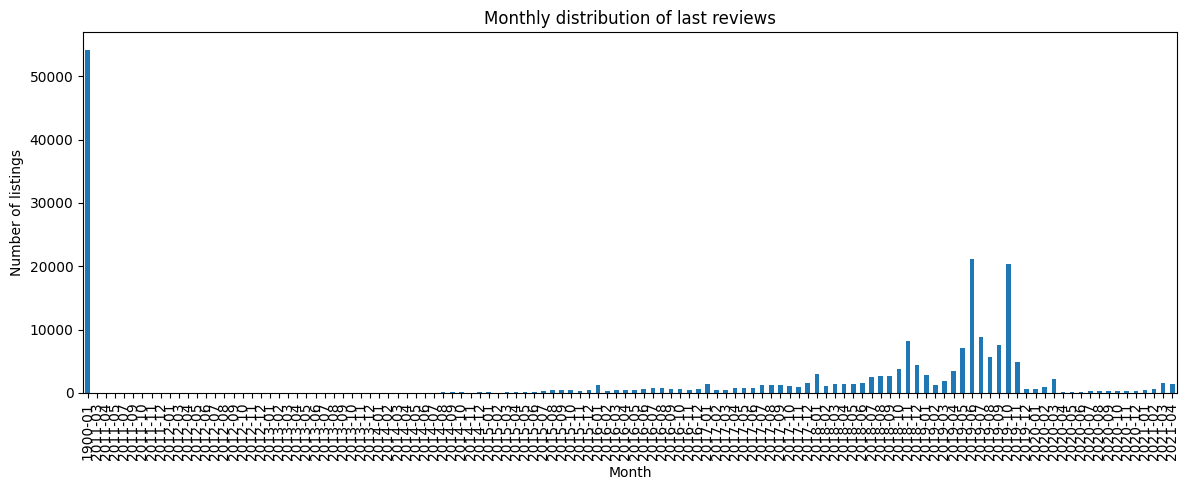

In [32]:
# Create a histogram of monthly review counts DO NOT TAKE INTO ACCOUNT the "1900-01-01" date which was imputed before
df_raw_1['last_review'].dropna().dt.to_period('M').value_counts().sort_index().plot(
    kind='bar',
    figsize=(12, 5),
    title='Monthly distribution of last reviews'
)
plt.xlabel('Month')
plt.ylabel('Number of listings')
plt.tight_layout()
plt.show()

In [33]:
# Create mask excluding '1900-01-01'
mask = (
    (df_raw_1['last_review'].isnull()) &
    (df_raw_1['number_of_reviews'] > 0) &
    (df_raw_1['reviews_per_month'] > 0)
)

# Calculate estimated days of last review based on number of reviews and reviews per month assiming a regular review pattern
estimated_months = df_raw_1.loc[mask, 'number_of_reviews'] / df_raw_1.loc[mask, 'reviews_per_month']
estimated_days = estimated_months * 30

# Impute dates only for rows with null last_review
latest_review_date = df_raw_1['last_review'].max()
df_raw_1.loc[mask, 'last_review'] = latest_review_date - pd.to_timedelta(estimated_days, unit='D')

In [34]:
df_raw_1['last_review'].isnull().sum() # 2,209
# Checking the number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()][['id', 'name', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)
# Checking the unique values of number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()]['number_of_reviews'].unique() # 1
df_raw_1[df_raw_1['last_review'].isnull()]['reviews_per_month'].unique() # 0.0

array([0.])

In [35]:
df_raw_1.loc[df_raw_1['last_review'].isnull(), 'last_review'] = pd.to_datetime("1900-01-01")

In [36]:
df_raw_1['last_review'].isnull().sum() # 0

np.int64(0)

In [37]:
# Eliminating the column "last_review" since it has no useful information after the imputations
df_raw_1.drop(columns=['last_review'], inplace=True)

####  <span style="color:#fe5608"> ["availability_365"] </span>

- Original nulls QTY: 11,466 -- 5.21%
- Distribuition with outliers
- Tokyo is the only city with no values
    - Imputed with the global mean of other cities.

TOKYO NEEDS TO BE LOOKED CAREFULLY    

In [38]:
# Percentage of null values in columns "availability_365" round to 2 decimal places
null_availability = df_raw_1['availability_365'].isnull().mean() * 100
null_availability.round(2)  # 5.21%

np.float64(5.21)

count    208565.000000
mean        120.330918
std         134.644491
min           0.000000
25%           0.000000
50%          64.000000
75%         244.000000
max         365.000000
Name: availability_365, dtype: float64


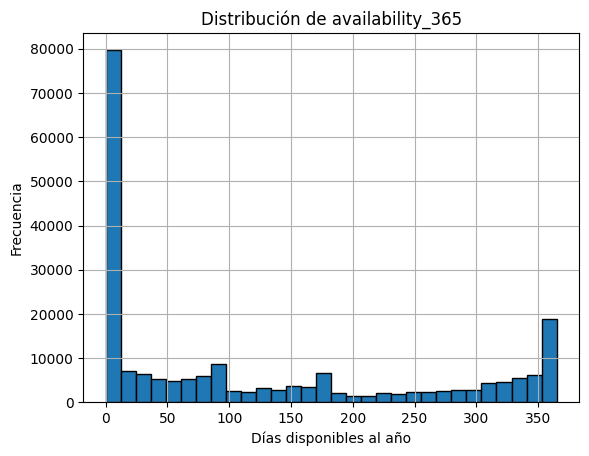

In [39]:
print(df_raw_1['availability_365'].describe())


df_raw_1['availability_365'].hist(bins=30, edgecolor='black')
plt.title('Distribución de availability_365')
plt.xlabel('Días disponibles al año')
plt.ylabel('Frecuencia')
plt.show()

In [40]:
# Check unique values in "room_type" column
df_raw_1['room_type'].nunique() # 4
df_raw_1['room_type'].unique()  # ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']

# Check nulls in availability_365 grouped by City
df_raw_1[df_raw_1['availability_365'].isnull()].groupby('city')['availability_365'].count() # Only Tokyo has nulls

# Check nulls in availability_365 grouped by room_type
df_raw_1[df_raw_1['availability_365'].isnull()].groupby('room_type')['availability_365'].count() # It has only 3 types of room and they are all null. Entire home/apt, Private room & Shared room

room_type
Entire home/apt    0
Private room       0
Shared room        0
Name: availability_365, dtype: int64

        city        room_type  availability_365
0     London  Entire home/apt              48.0
1     London       Hotel room             308.0
2     London     Private room              64.0
3     London      Shared room              90.0
4     Madrid  Entire home/apt             147.0
5     Madrid       Hotel room             269.0
6     Madrid     Private room              90.0
7     Madrid      Shared room             104.0
8      Milan  Entire home/apt             128.0
9      Milan       Hotel room             174.0
10     Milan     Private room              90.0
11     Milan      Shared room              89.0
12  New York  Entire home/apt              42.0
13  New York     Private room              45.0
14  New York      Shared room              90.0
15    Sydney  Entire home/apt              41.0
16    Sydney     Private room              27.0
17    Sydney      Shared room              34.0
18     Tokyo  Entire home/apt               NaN
19     Tokyo     Private room           

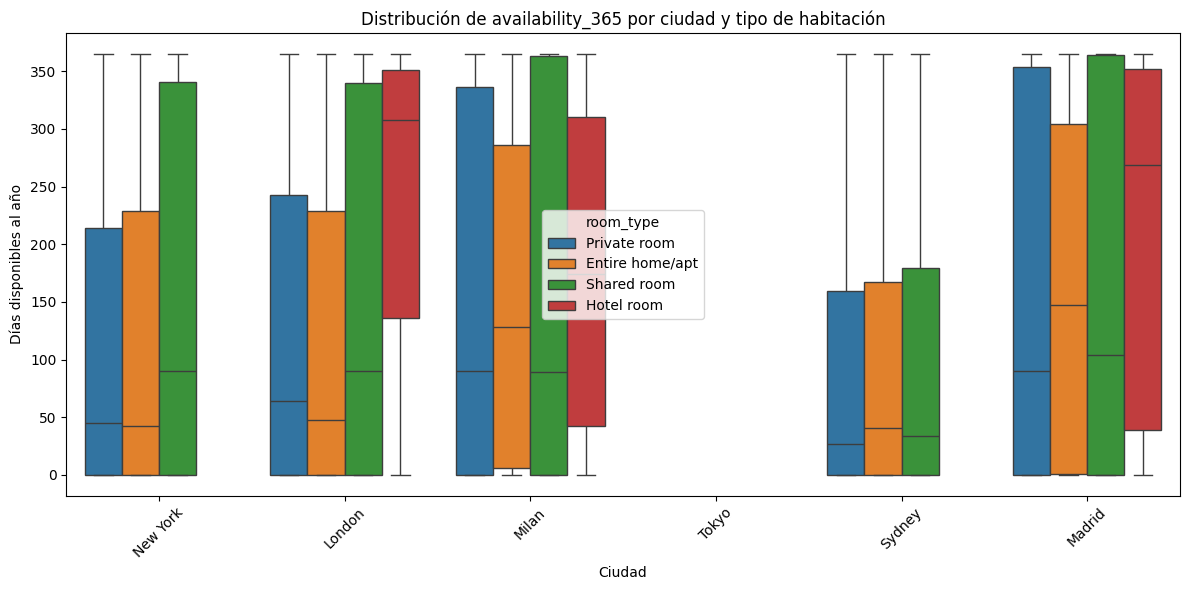

In [41]:
# Calcular la mediana de availability_365 por city y room_type
availability_medians = df_raw_1.groupby(['city', 'room_type'])['availability_365'].median().reset_index()

# Ordenamos para visualización más clara
availability_medians = availability_medians.sort_values(by=['city', 'room_type'])

# Mostramos el resultado
print(availability_medians)


plt.figure(figsize=(12,6))
sns.boxplot(data=df_raw_1, x='city', y='availability_365', hue='room_type')
plt.title('Distribución de availability_365 por ciudad y tipo de habitación')
plt.ylabel('Días disponibles al año')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
# Compute global mean availability by room type
global_availability_means = df_raw_1.groupby('room_type')['availability_365'].mean()

# Function to impute Tokyo rows only
def impute_tokyo_availability(row):
    if pd.notnull(row['availability_365']):
        return row['availability_365']
    
    if row['city'] == 'Tokyo':
        room_type = row['room_type']
        if room_type in global_availability_means:
            return global_availability_means[room_type]
    
    return row['availability_365']  # Return original (including NaN) for other cities

# Calling function
df_raw_1['availability_365'] = df_raw_1.apply(impute_tokyo_availability, axis=1)


In [43]:
df_raw_1['availability_365'].isnull().sum() # 0

np.int64(0)

####  <span style="color:#fe5608"> ["calculated_host_listings_count"] </span>

- Original nulls QTY: 11,466 -- 5.21%
- Tokyo is the city with null values
- Imputed with zero "0"
- This column has nothing to do with the appartment and everything to do with the host, since in this dataset there's nothing regarding the host, it has no sense to impute.
- NOT TO TAKE INTO ACCOUNT TOKYO in this COLUMN

In [44]:
# Check the nulls groped by city
df_raw_1[df_raw_1['calculated_host_listings_count'].isnull()].groupby('city')['calculated_host_listings_count'].count() # Tokyo is completely null

city
Tokyo    0
Name: calculated_host_listings_count, dtype: int64

####  <span style="color:#fe5608"> ["host_name"] </span>

- Original nulls qty: 706
- host_id : 175128252 has at least 2 different host_names
    - It seems the name was changed for company reasons
    - It will be changed to "Team Gospodin"
- After 1st imputation: qty of nulls: 586
- After 2nd impitation: qty of nulls 0

In [45]:
# Check for missing values in 'host_name'
host_nulls = df_raw_1[df_raw_1['host_name'].isnull()]

# Extracting unique host_ids with null 'host_name'
host_ids_with_nulls = host_nulls['host_id'].unique()

# Look for host rows where the host has a name in some entries but not in others.
recoverable_hosts = df_raw_1[
    (df_raw_1['host_id'].isin(host_ids_with_nulls)) &
    (df_raw_1['host_name'].notnull())
].sort_values('host_id')[['host_id', 'host_name']].drop_duplicates()

recoverable_hosts

,host_id,host_name
103529,175128252,Gospodin
219624,175128252,Team Gospodin


In [46]:
df_raw_1.loc[df_raw_1['host_id'] == 175128252, 'host_name'] = "Team Gospodin"

In [47]:
# Imputing "Unknown host name" for rows where host_name is null
df_raw_1.fillna({"host_name": "Unknown host name"}, inplace=True)

In [48]:
df_raw_1['host_name'].isnull().sum()  # 0

np.int64(0)

####  <span style="color:#fe5608"> ["name"]  </span>

- Original nulls qty: 67
    - Too little to keep BUT, let's keep it for the moment
        - Since it is necessary for the rows to be filled for the possible future model, let's impute them with "Unknown title "

In [49]:
# Ver cuántos nombres están nulos
df_raw_1['name'].isnull().sum()

# Ver si esos ID están duplicados con algún name no nulo
ids_with_null_name = df_raw_1[df_raw_1['name'].isnull()]['id'].unique()

# Buscar si esos ID aparecen en otras filas con name no nulo
recoverable_names = df_raw_1[
    (df_raw_1['id'].isin(ids_with_null_name)) &
    (df_raw_1['name'].notnull())
][['id', 'name']].drop_duplicates()

recoverable_names

,id,name


In [50]:
# Fill missing host names with "Unknown host"
df_raw_1['name'] = df_raw_1['name'].fillna("Unknown title")

In [51]:
df_raw_1['name'].isnull().sum()  # 0

np.int64(0)

____
####  <span style="color:#f6f794"> Checking again for nulls </span>

In [52]:
df_raw_1.isna().sum().sort_values(ascending=False)

calculated_host_listings_count    11466
id                                    0
host_id                               0
name                                  0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
host_name                             0
longitude                             0
room_type                             0
minimum_nights                        0
price                                 0
number_of_reviews                     0
reviews_per_month                     0
availability_365                      0
city                                  0
dtype: int64

____
####  <span style="color:#f6f794"> Checking for outliers </span>

____
####  <span style="color:#f6f794"> Changing price from local to USD </span>

In [53]:
# Checking the describe of "price" column grouped by "city"
df_raw_1.groupby('city')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
London,85068.0,122.34,220.75,0.0,47.0,84.0,140.0,12345.0
Madrid,19618.0,129.27,484.14,0.0,35.0,58.0,100.0,9999.0
Milan,18322.0,115.09,290.79,8.0,50.0,73.5,110.0,11999.0
New York,48895.0,152.72,240.15,0.0,69.0,106.0,175.0,10000.0
Sydney,36662.0,207.69,323.82,0.0,80.0,136.0,223.0,14999.0
Tokyo,11466.0,14984.70,33273.45,0.0,6026.0,10007.0,17216.0,1000046.0


In [55]:
# Convertion of prices to USD as of last_review's date exchange rate (17 April 2021)

def convert_price_to_usd(price, city):
    """
    Convert price to USD based on the city.
    """
    conversion_rates = {
        'Madrid':   1.1981314389221223,      # EUR to USD
        'New York': 1.00,                    # USD to USD
        'London':   1.3834553729076053,      # GBP to USD 
        'Milan':    1.1981314389221223,      # EUR to USD
        'Tokyo':    0.009192860637696393,    # JPY to USD 
        'Sydney':   0.7735695491590678,      # AUD to USD
    }

    
    if city in conversion_rates:
        return price * conversion_rates[city]
    else:
        return price  # If city not in conversion rates, return original price
    

# Creating new column "price_USD" with the converted prices
df_raw_1['price_USD'] = df_raw_1.apply(lambda row: convert_price_to_usd(row['price'], row['city']), axis=1)

In [56]:
df_raw_1['price_USD']

0         149.000000
1         225.000000
2         150.000000
3          89.000000
4          80.000000
             ...    
220026     27.557023
220027     25.160760
220028     26.358892
220029     22.764497
220030     23.962629
Name: price_USD, Length: 220031, dtype: float64

___
####  <span style="color:#f6f794"> Rearranging columns </span>

In [62]:
# Re arrange columns to have 'price_USD' next to 'price'

df_raw_1= df_raw_1[['id', 'name', 'host_id', 'host_name', 'city', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',  
                     'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price', 'price_USD',]]

___
###   <span style="color:#f6f794"> 💾 Saving clean data to make a deep analysis. </span>

In [63]:
df_raw_1

,id,name,host_id,host_name,city,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_USD
0,2539,Clean & quiet apt home by the park,2787,John,New York,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6.0,365.0,149,149.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,New York,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2.0,355.0,225,225.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,New York,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1.0,365.0,150,150.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,New York,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1.0,194.0,89,89.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,New York,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1.0,0.0,80,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Madrid,Centro,Embajadores,40.40756,-3.69937,Private room,30,0,0.00,8.0,349.0,23,27.557023
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Madrid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,30,0,0.00,8.0,350.0,21,25.160760
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Madrid,Chamberí,Arapiles,40.43857,-3.70715,Private room,7,0,0.00,8.0,364.0,22,26.358892
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Madrid,Salamanca,Guindalera,40.43027,-3.66759,Private room,30,0,0.00,8.0,349.0,19,22.764497


___
####   <span style="color:#f6f794"> Dictionary updated: </span>

| Columns Name                      | Meaning                                                                           | 
|-----------------------------------|-----------------------------------------------------------------------------------|
| `id`                              | ID of the announcement                                                            |
| `name`                            | Name of title of the announcement                                                 |
| `host_id`                         | ID of the host of the Airbnb                                                      |
| `host_name`                       | Name of the person who host the Airbnb                                            |
| `city`                            | City where the Airbnb is located.                                                 |
| `neighbourhood_group`             | Depending on how the administrative states work                                   |
| `neighbourhood`                   | Lorem ipsum     |
| `latitude`                        | Latitud of the appartment's location                                              |
| `longitude`                       | Longitud of the appartment's location                                             |
| `room_type`                       | Type of appartment                                                                |
| `minimum_nights`                  | Minimum nights requested to stay at the appartment by the host                    |
| `number_of_reviews`               | Number of reviews received to the appartment                                      |
| `reviews_per_month`               | Number of reviews received by month                                               |
| `calculated_host_listings_count`  | Number of active listings a host has at data collection time. It shows whether a host is casual (one listing) or managing multiple properties (a small business)     |
| `availability_365`                | Number of days the appartment is available by                                     |
| `price`                           | Price per night in local currency (original dataset price)                        |
| `price_USD`                       | Price per night in USD currency (converted on rate exchange of 17/april/2021)     |